
As imobiliárias têm um grande desafio que é definir um bom valor para uma casa pois se este valor estiver muito baixo, o cliente perde dinheiro, e se estiver muito alto, a casa não será vendida. Para auxiliar uma imobiliária vamos criar um modelo que prevê o preço ideal de venda de uma casa.

Para treinar o modelo vamos usar a biblioteca bonton house prices que já está disponível na biblioteca sklearing. Se você quiser, pode também baixar a base na internet, é bem simples de encontrá-la no Google.

Para criação do modelo vamos utilizar um algoritmo de regressão linear  e a avaliação será feita por meio de erro médio quadrático (mean Squared Error)

Para saber mais sobre a base acesse o link a seguir:

https://scikit-learn.org/0.24/modules/generated/sklearn.datasets.load_boston.html

Base de dadis original:

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


In [48]:
from sklearn.datasets import load_boston
housingPrices = load_boston()
housingPrices

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

**Organizando os dados em um dataframe: No dataframe temos os dados de cada tumor e também o target de cada um deles. Preste atenção na quantidade de observação que a base possui bem como todos os atributos**

In [49]:
#Agora vamos organizar a base de dados em um dataframe usando a biblioteca pandas. 
import pandas as pd
df = pd.DataFrame(housingPrices.data, columns=[housingPrices.feature_names])
#add o target
df['valor']=housingPrices.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,valor
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**1)** A partir do dataframe acima, que chamamos de df, identifique e divida as observações e o target. As observações devem ser referenciadas como X e os targets como Y. Por exemplo:

X = observações

Y = targets

In [50]:
X=df[housingPrices.feature_names]
Y=df['valor']

**2)** Agora, divida  X e Y em treino, teste e validação

In [53]:
from sklearn.model_selection import train_test_split

#divide em treino e teste sendo 30%para teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X,Y,
    test_size=0.3, shuffle = True, random_state = 8)

# pega a base de teste e divide em teste e validação
Xteste, Xval, Yteste, Yval = train_test_split(Xteste, Yteste, 
    test_size=0.5, random_state= 8)

Vamos utilizar um algorítmo de regressão linear para criar o modelo:

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics


#Criando um modelo de regressão linear variando os parâmetros tol e max_iter
model=LinearRegression(n_jobs=100)

#Treinando o modelo. Use aqui suas observações de treino e os targets de treino
model.fit(Xtreino, Ytreino)

#Fazendo predições. Use aqui sua base de teste
result = model.predict(Xteste)

#mostrando os resultados preditos pelo modelo 
print('Resultado:')
print(result)

print('Resultado Esperado:')
#Os resultados esperados são os targets de teste, mostre-os a seguir
print(Yteste)


#agora vamos calcular o erro do modelo usando a base de testes
print("Erro:", metrics.mean_squared_error(result,Yteste))

Resultado:
[[13.2169675 ]
 [32.18022867]
 [19.3854543 ]
 [10.70895753]
 [19.9447559 ]
 [14.13144421]
 [22.30364436]
 [39.98110311]
 [16.26715147]
 [21.75795098]
 [25.60236289]
 [31.0578872 ]
 [27.39820797]
 [32.07361063]
 [32.77697248]
 [25.42014553]
 [14.17206244]
 [38.22183643]
 [22.33689496]
 [36.33985245]
 [13.85691136]
 [13.06383643]
 [21.21333233]
 [28.10154622]
 [25.3635775 ]
 [20.04628374]
 [30.65625738]
 [25.79184486]
 [19.59457401]
 [21.2118773 ]
 [18.53634825]
 [14.43624139]
 [ 8.69947126]
 [12.83834525]
 [21.06565863]
 [29.58030904]
 [28.85469028]
 [22.92612756]
 [ 5.93891502]
 [18.56463993]
 [27.99121808]
 [ 6.22134751]
 [37.64707596]
 [12.76563098]
 [ 5.18094668]
 [15.87909973]
 [36.0022969 ]
 [21.5045473 ]
 [29.18926733]
 [24.38677706]
 [16.28495814]
 [35.36378927]
 [16.57330724]
 [34.65889684]
 [22.6877368 ]
 [ 0.04312843]
 [15.7326924 ]
 [21.13184502]
 [28.56185743]
 [23.08377801]
 [35.48649823]
 [21.73890171]
 [10.15964645]
 [24.25609261]
 [25.32205949]
 [20.52762882]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [63]:
#Fazendo predições. Use aqui sua base de teste
result = model.predict(Xval)

#mostrando os resultados preditos pelo modelo 
print('Resultado:')
print(result)

print('Resultado Esperado:')
#Os resultados esperados são os targets de teste, mostre-os a seguir
print(Yval)


#agora vamos calcular o erro do modelo usando a base de testes
print("Erro:", metrics.mean_squared_error(result,Yval))

Resultado:
[[40.86360853]
 [23.47314327]
 [14.36500631]
 [27.18957229]
 [17.77498272]
 [25.72569699]
 [33.20341621]
 [23.05805704]
 [21.36278539]
 [21.94732168]
 [20.81794378]
 [34.76079769]
 [36.84062151]
 [20.3417074 ]
 [28.71277557]
 [25.63301843]
 [21.027127  ]
 [37.26266372]
 [13.85600637]
 [19.10758698]
 [32.43896087]
 [10.90135199]
 [20.30967384]
 [21.22670824]
 [12.90913926]
 [19.36667199]
 [16.7872355 ]
 [27.23008993]
 [22.4756561 ]
 [41.56628369]
 [23.51437086]
 [15.30594202]
 [30.52378626]
 [15.49334209]
 [31.25425413]
 [29.82341564]
 [23.24237071]
 [26.58820646]
 [22.62515352]
 [24.8414899 ]
 [35.6424629 ]
 [22.06013745]
 [13.87623091]
 [20.08017474]
 [28.81752984]
 [24.31696286]
 [35.29690286]
 [21.53407601]
 [25.653496  ]
 [39.73073901]
 [19.78454922]
 [28.57730026]
 [35.44676805]
 [29.06780771]
 [20.53304151]
 [13.83018556]
 [ 5.29117863]
 [ 7.48552506]
 [27.00326966]
 [17.33257611]
 [21.56841129]
 [27.462814  ]
 [ 2.68371818]
 [29.03760856]
 [18.42844291]
 [28.66897069]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


visualizar o resultado

Text(0.5, 1.0, "Predicted Prices vs Prices,{'size':20}")

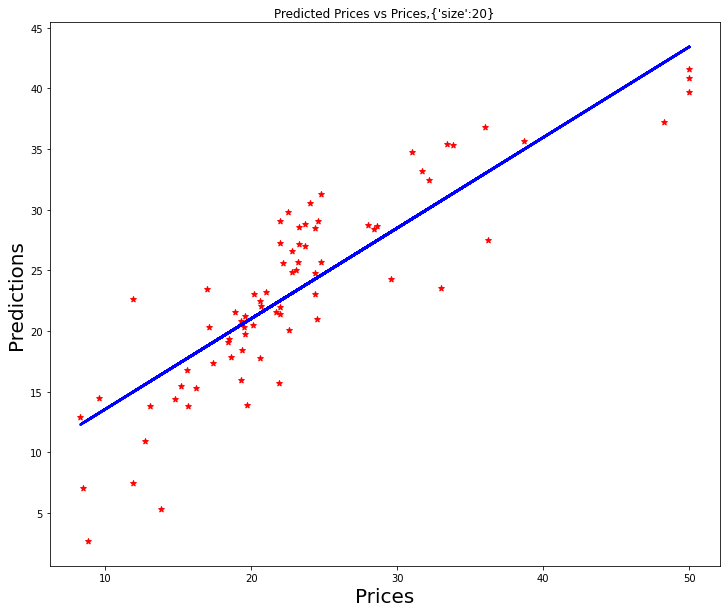

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,10))
plt.scatter(Yval,result,color='Red',marker='*')

regline = lambda S: 0.7466*Yval +6.0860359
S=np.array([Yval.min(),Yval.max()])
plt.plot(Yval,regline(S),lw=2.5, c="BLUE")

plt.xlabel("Prices",{'size':20})
plt.ylabel("Predictions",{'size':20})
plt.title("Predicted Prices vs Prices,{'size':20}")